# Demonstration of Machine Learning in Python

#### This document shows a very simple demonstration of Machine Learning in Python.
#### It reads a csv file that contains list of people and the type of footwear that they used and the type of terrain that they were using them
#### This program uses RandonForest classifier

#### 1. Import the necessary libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#### 2. Read the csv file

In [2]:
data = pd.read_csv("DemoOfMLLifeCycle.csv")

#### 3. Dropping the unwanted columns from the dataset

In [3]:
data = data.drop(['Name', 'Age', 'Sex'], axis = 1)

In [4]:
data

,TerrainType,Month,Footwear Type
0,Road,January,Slippers
1,Road,April,Slippers
2,Road,October,Slippers
3,Forest,March,Boots
4,Mountain,April,Hiking shoes
5,Mountain,October,Hiking shoes
6,Forest,November,Boots
7,Road,March,Slippers
8,Mountain,January,Hiking shoes
9,Forest,May,Boots


#### 4. Splitting 70% of the dataset randomly for training the model

In [5]:
training_data = data.sample(frac=0.7, random_state=1)

In [6]:
training_data

,TerrainType,Month,Footwear Type
17,Road,March,Slippers
21,Road,April,Slippers
10,Road,January,Slippers
19,Forest,May,Boots
14,Mountain,April,Hiking shoes
20,Road,January,Slippers
26,Forest,November,Boots
3,Forest,March,Boots
24,Mountain,April,Hiking shoes
22,Road,October,Slippers


#### 5. Using the remaining 30% of data to test the model

In [7]:
testing_data = data.drop(training_data.index)

#### 6. Extracting the features from the training and test data by removing the label which is 'Footwear Type'

In [8]:
x_train = training_data.drop('Footwear Type', axis = 1)
x_test = testing_data.drop('Footwear Type', axis = 1)

#### 7. Assigning the label from training data and testing data to respective variables

In [9]:
y_train = training_data['Footwear Type']
y_test = testing_data['Footwear Type']

#### 8. Encode Categoricals into numeric values

The data that can be used in Machine Learning are only numerical data. The other types are called Categorical data and if we have any non numeric data, i.e. Categorical data, then we have to encode those categorical data into numeric values using encoders. There are many ways to encode categorical data and here we are using OrdinalEncoder for encoding features and LabelEncoder to encode the label, i.e. the dependant variable


In [10]:
ord_enc = OrdinalEncoder()
lab_enc = LabelEncoder()
x_train_pp = ord_enc.fit_transform(x_train)
x_train_values = ord_enc.inverse_transform(x_train_pp)
df_x_train = pd.DataFrame(x_train_pp, columns=x_train.columns)

x_test_pp = ord_enc.fit_transform(x_test)
x_test_values = ord_enc.inverse_transform(x_test_pp)
df_x_test = pd.DataFrame(x_test_pp, columns=x_test.columns)

y_test_pp = lab_enc.fit_transform(y_test.values.ravel())
y_test_values = lab_enc.inverse_transform(y_test_pp)

y_train_pp = lab_enc.fit_transform(y_train.values.ravel())
y_train_values = lab_enc.inverse_transform(y_train_pp)

#### We shall just print and see the various datasets

In [11]:
x_train_values

array([['Road', 'March'],
       ['Road', 'April'],
       ['Road', 'January'],
       ['Forest', 'May'],
       ['Mountain', 'April'],
       ['Road', 'January'],
       ['Forest', 'November'],
       ['Forest', 'March'],
       ['Mountain', 'April'],
       ['Road', 'October'],
       ['Forest', 'March'],
       ['Mountain', 'April'],
       ['Road', 'October'],
       ['Mountain', 'October'],
       ['Forest', 'November'],
       ['Mountain', 'January'],
       ['Forest', 'March'],
       ['Road', 'March'],
       ['Road', 'March'],
       ['Road', 'April'],
       ['Forest', 'November']], dtype=object)

In [12]:
x_test_values

array([['Road', 'January'],
       ['Mountain', 'October'],
       ['Mountain', 'January'],
       ['Forest', 'May'],
       ['Road', 'April'],
       ['Road', 'October'],
       ['Mountain', 'October'],
       ['Mountain', 'January'],
       ['Forest', 'May']], dtype=object)

In [13]:
y_train_values

array(['Slippers', 'Slippers', 'Slippers', 'Boots', 'Hiking shoes',
       'Slippers', 'Boots', 'Boots', 'Hiking shoes', 'Slippers', 'Boots',
       'Hiking shoes', 'Slippers', 'Hiking shoes', 'Boots',
       'Hiking shoes', 'Boots', 'Slippers', 'Slippers', 'Slippers',
       'Boots'], dtype=object)

In [14]:
y_test_values

array(['Slippers', 'Hiking shoes', 'Hiking shoes', 'Boots', 'Slippers',
       'Slippers', 'Hiking shoes', 'Hiking shoes', 'Boots'], dtype=object)

#### 9. Build the model

In [15]:
model = RandomForestClassifier(n_estimators=100).fit(df_x_train, y_train_pp.ravel())

#### 10. Predict using the model

In [16]:
y_pred = model.predict(x_test_pp).astype(int)

In [17]:
y_pred_values = lab_enc.inverse_transform(y_pred)
y_pred_values

array(['Slippers', 'Boots', 'Hiking shoes', 'Boots', 'Slippers',
       'Slippers', 'Boots', 'Hiking shoes', 'Boots'], dtype=object)

#### Plot Terrain Type vs Footwear Type for Test dataset

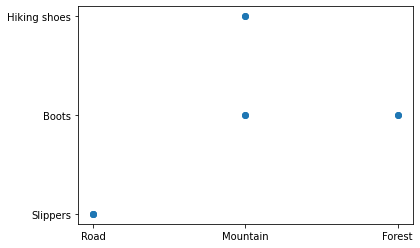

In [18]:
plt.scatter(x_test['TerrainType'], y_pred_values)

#### Plot Terrain Type vs Footwear Type for Training dataset

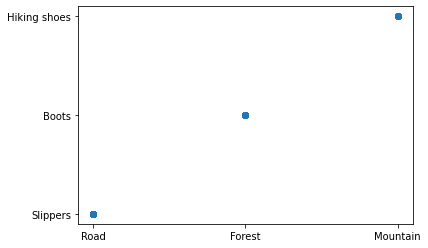

In [19]:
plt.scatter(x_train['TerrainType'], y_train.squeeze())